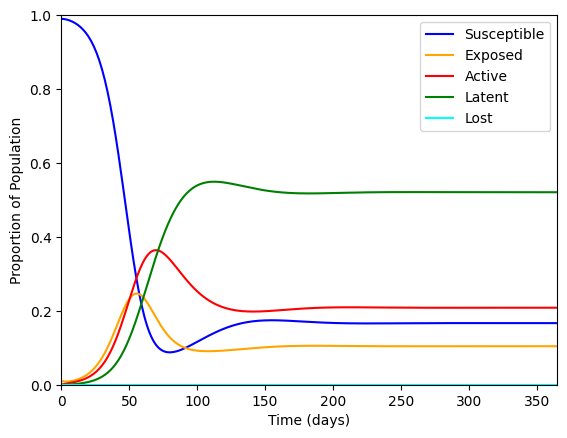

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# SEIRD model equations
def SEIR_model(y, t, beta, sigma, gamma, xi, mu):
    S, E, I, R, D = y
    dSdt = -beta * S * I + xi * R
    dEdt = beta * S * I - sigma * E
    dIdt = sigma * E - gamma * I - mu * I
    dRdt = gamma * I - xi * R
    dDdt = mu*I
    return [dSdt, dEdt, dIdt, dRdt, dDdt]

# Initial conditions
S0 = 0.99  
E0 = 0.01  
I0 = 0.00  
R0 = 0.00  
D0 = 0.00
y0 = [S0, E0, I0, R0, D0]

# Parameters
beta = 0.3 # Tasa de transmisión.    
sigma = 0.1  # Tasa de progresión (de expuestos a infectados). 
gamma = 0.05 # Tasa de recuperación.
xi = 0.02  # Tasa de pérdida de inmunidad.
mu = 0.0 # Tasa de mortalidad
# Time vector
t = np.linspace(0, 365, 365)  


solution = odeint(SEIR_model, y0, t, args=(beta, sigma, gamma, xi, mu))
S, E, I, R, D = solution.T

# Configurar la figura para la animación
fig, ax = plt.subplots()
ax.set_xlim(0, t.max())
ax.set_ylim(0, 1)
plt.xlabel('Time (days)')
plt.ylabel('Proportion of Population')

# Líneas para cada variable
line_S, = ax.plot([], [], label="Susceptible", color="blue")
line_E, = ax.plot([], [], label="Exposed", color="orange")
line_I, = ax.plot([], [], label="Active", color="red")
line_R, = ax.plot([], [], label="Latent", color="green")
line_D, = ax.plot([], [], label="Lost", color="cyan")
ax.legend()

# Función de inicialización
def init():
    line_S.set_data([], [])
    line_E.set_data([], [])
    line_I.set_data([], [])
    line_R.set_data([], [])
    line_D.set_data([], [])
    return line_S, line_E, line_I, line_R, line_D

# Función para actualizar la animación
def update(frame):
    line_S.set_data(t[:frame], S[:frame])
    line_E.set_data(t[:frame], E[:frame])
    line_I.set_data(t[:frame], I[:frame])
    line_R.set_data(t[:frame], R[:frame])
    line_D.set_data(t[:frame], D[:frame])
    return line_S, line_E, line_I, line_R, line_D

# Crear la animación
anim = FuncAnimation(fig, update, frames=len(t), init_func=init, blit=True)

# Mostrar la animación en Jupyter Notebook
HTML(anim.to_html5_video())
#anim.save('SEIR_model_animation.mp4', writer='ffmpeg')
